In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

/tmp/ipykernel_30728/3653643010.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  h_statistic, p_value = stats.kruskal(*[group['Fare'].values for name, group in deck_data.groupby('Deck')])


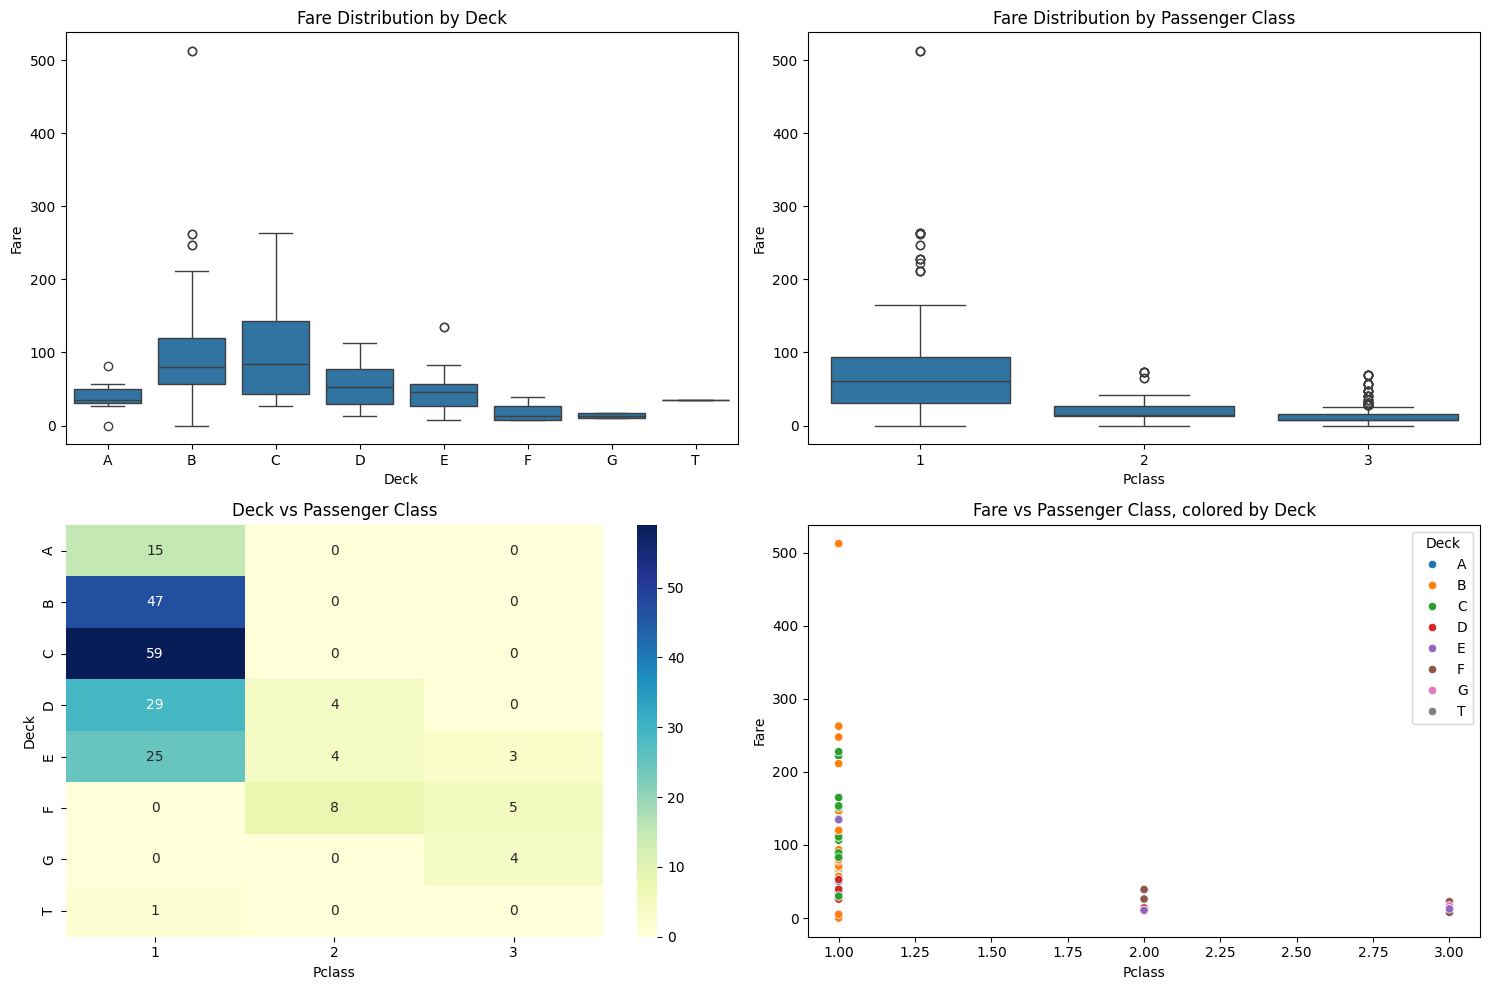

Correlation Matrix:
                Pclass      Fare  Deck_Numeric
Pclass        1.000000 -0.688032     -0.652914
Fare         -0.688032  1.000000      0.515236
Deck_Numeric -0.652914  0.515236      1.000000

Kruskal-Wallis H-test for Fare across Decks:
H-statistic: 63.38143466910647, p-value: 3.177972829974735e-11

One-way ANOVA for Fare across Passenger Classes:
F-statistic: 242.34415651744814, p-value: 1.0313763209141171e-84

Summary of Deck Distribution:
Deck
C    0.289216
B    0.230392
D    0.161765
E    0.156863
A    0.073529
F    0.063725
G    0.019608
T    0.004902
Name: proportion, dtype: float64


In [4]:
df['Deck'] = df['Cabin'].str[0]

deck_order = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
df['Deck_Numeric'] = pd.Categorical(df['Deck'], categories=deck_order, ordered=True).codes

correlation = df[['Pclass', 'Fare', 'Deck_Numeric']].corr(method='spearman')

deck_data = df[df['Deck'].notna()].copy()
deck_data['Deck'] = pd.Categorical(deck_data['Deck'])

h_statistic, p_value = stats.kruskal(*[group['Fare'].values for name, group in deck_data.groupby('Deck')])

f_statistic, p_value_class = stats.f_oneway(*[group['Fare'].values for name, group in df.groupby('Pclass')])

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.boxplot(x='Deck', y='Fare', data=deck_data)
plt.title('Fare Distribution by Deck')

plt.subplot(2, 2, 2)
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title('Fare Distribution by Passenger Class')

plt.subplot(2, 2, 3)
cross_tab = pd.crosstab(deck_data['Deck'], deck_data['Pclass'])
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Deck vs Passenger Class')

plt.subplot(2, 2, 4)
sns.scatterplot(x='Pclass', y='Fare', hue='Deck', data=deck_data)
plt.title('Fare vs Passenger Class, colored by Deck')

plt.tight_layout()
plt.show()

print("Correlation Matrix:")
print(correlation)
print("\nKruskal-Wallis H-test for Fare across Decks:")
print(f"H-statistic: {h_statistic}, p-value: {p_value}")
print("\nOne-way ANOVA for Fare across Passenger Classes:")
print(f"F-statistic: {f_statistic}, p-value: {p_value_class}")

print("\nSummary of Deck Distribution:")
print(deck_data['Deck'].value_counts(normalize=True))

Deck range for each class:
       min max
Pclass        
1        A   E
2        D   F
3        E   G

Fare quartiles for each class-deck combination:
                 0.25      0.50        0.75
Pclass Deck                                
1      A     30.84790  35.50000   50.247900
       B     57.00000  80.00000  120.000000
       C     42.50210  83.47500  143.591650
       D     39.40000  75.25000   77.958300
       E     26.55000  55.00000   61.175000
       F          NaN       NaN         NaN
       G          NaN       NaN         NaN
2      A          NaN       NaN         NaN
       B          NaN       NaN         NaN
       C          NaN       NaN         NaN
       D     12.96875  13.00000   13.197925
       E     10.50000  11.42500   12.512500
       F     12.37500  26.00000   29.250000
       G          NaN       NaN         NaN
3      A          NaN       NaN         NaN
       B          NaN       NaN         NaN
       C          NaN       NaN         NaN
       D     

/tmp/ipykernel_30728/961211627.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fare_quartiles = deck_data.groupby(['Pclass', 'Deck'])['Fare'].quantile([0.25, 0.5, 0.75]).unstack()
/tmp/ipykernel_30728/961211627.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_fare = deck_data.groupby(['Pclass', 'Deck'])['Fare'].median().unstack()


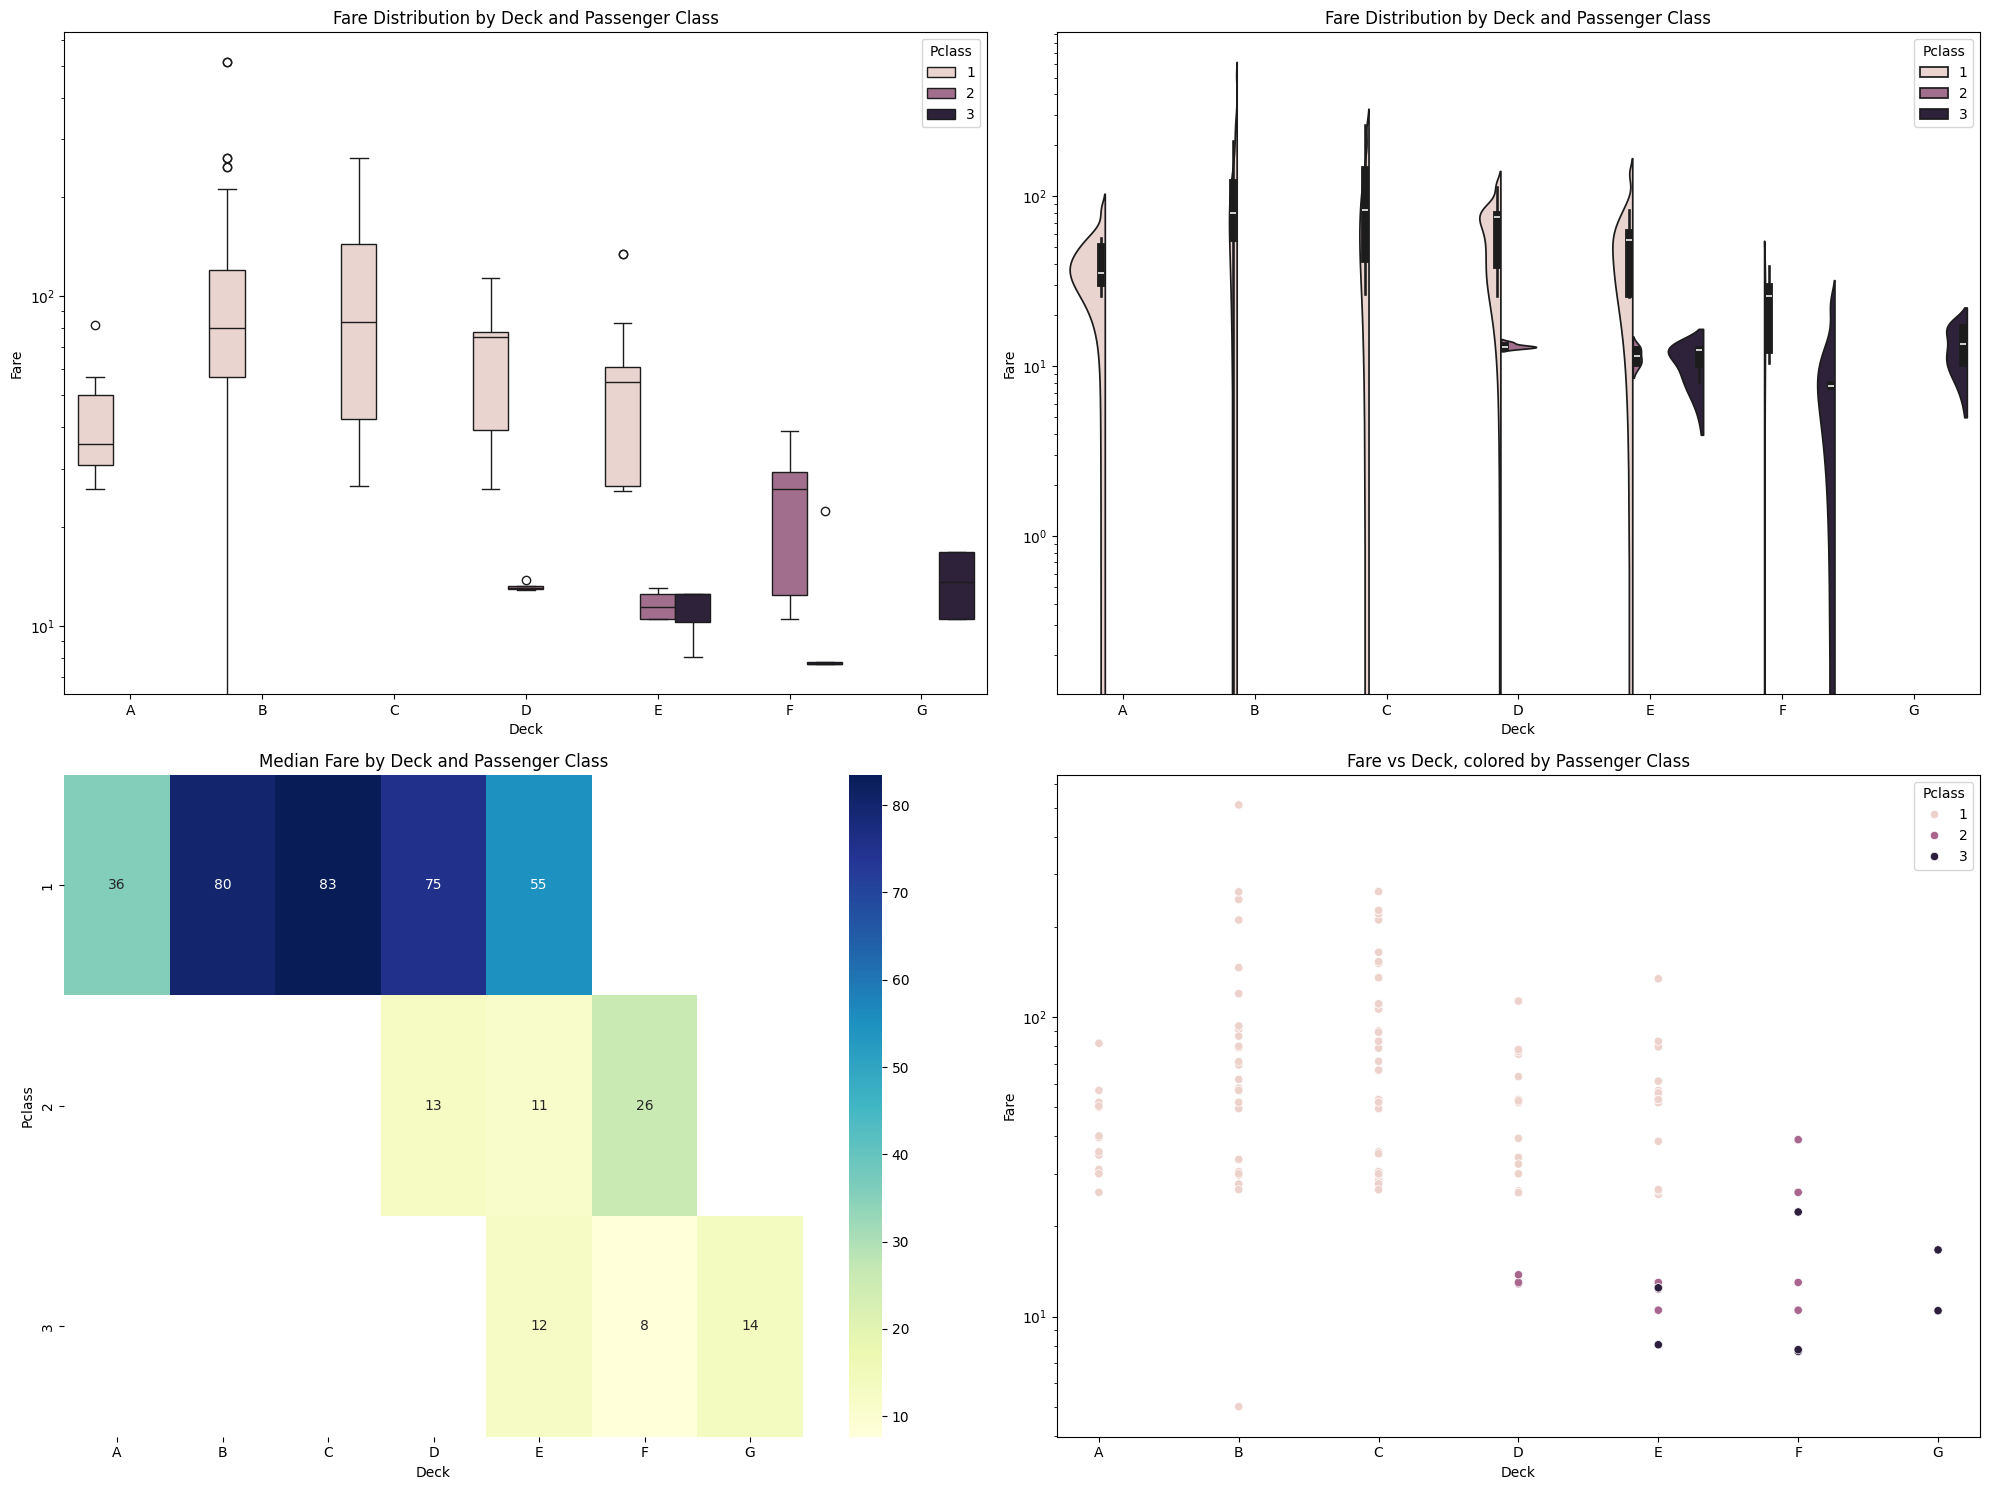


Summary of assigned decks:
Assigned_Deck
G    0.542088
F    0.203143
E    0.081930
C    0.066218
B    0.052750
D    0.037037
A    0.016835
Name: proportion, dtype: float64


In [5]:

deck_order = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
df['Deck'] = pd.Categorical(df['Deck'], categories=deck_order, ordered=True)

# Prepare data for analysis
deck_data = df[df['Deck'].notna()].copy()

# Analyze deck range for each class
class_deck_range = deck_data.groupby('Pclass')['Deck'].agg(['min', 'max'])
print("Deck range for each class:")
print(class_deck_range)

# Calculate quartiles of fare for each class-deck combination
fare_quartiles = deck_data.groupby(['Pclass', 'Deck'])['Fare'].quantile([0.25, 0.5, 0.75]).unstack()
print("\nFare quartiles for each class-deck combination:")
print(fare_quartiles)

# Visualizations
plt.figure(figsize=(20, 15))

# Boxplot of Fare by Deck for each Pclass
plt.subplot(2, 2, 1)
sns.boxplot(x='Deck', y='Fare', hue='Pclass', data=deck_data)
plt.title('Fare Distribution by Deck and Passenger Class')
plt.yscale('log')  # Log scale for better visibility

# Violin plot of Fare by Deck for each Pclass
plt.subplot(2, 2, 2)
sns.violinplot(x='Deck', y='Fare', hue='Pclass', data=deck_data, split=True)
plt.title('Fare Distribution by Deck and Passenger Class')
plt.yscale('log')

# Heatmap of median Fare by Deck and Pclass
plt.subplot(2, 2, 3)
median_fare = deck_data.groupby(['Pclass', 'Deck'])['Fare'].median().unstack()
sns.heatmap(median_fare, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Median Fare by Deck and Passenger Class')

# Scatter plot of Fare vs Deck, colored by Pclass
plt.subplot(2, 2, 4)
sns.scatterplot(x='Deck', y='Fare', hue='Pclass', data=deck_data)
plt.title('Fare vs Deck, colored by Passenger Class')
plt.yscale('log')

plt.tight_layout()
plt.show()

# Function to assign deck based on class and fare
def assign_deck(row):
    if pd.isna(row['Deck']):
        pclass = row['Pclass']
        fare = row['Fare']
        class_fares = fare_quartiles.loc[pclass]
        
        for deck in deck_order:
            if deck in class_fares.columns:
                if fare <= class_fares[deck][0.75]:
                    return deck
        
        # If no deck assigned, return the highest deck for that class
        return class_deck_range.loc[pclass, 'max']
    return row['Deck']

# Apply the function to assign decks
df['Assigned_Deck'] = df.apply(assign_deck, axis=1)

# Print summary of assigned decks
print("\nSummary of assigned decks:")
print(df['Assigned_Deck'].value_counts(normalize=True))

In [6]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [7]:
def assign_age_group(row):
    if pd.isna(row['Age']):
        if row['FamilySize'] > 1 and row['Parch'] > 0:
            return 'Child'
        else:
            return 'Adult'
    else:
        if row['Age'] < 18:
            return 'Child'
        else:
            return 'Adult'

In [8]:
df['AgeGroup'] = df.apply(assign_age_group, axis=1)
median_ages = df.groupby('AgeGroup')['Age'].median()

def impute_age(row):
    if pd.isna(row['Age']):
        return median_ages.loc[row['AgeGroup']]
    return row['Age']

df['Age_Imputed'] = df.apply(impute_age, axis=1)
df['Age_Category'] = pd.cut(df['Age_Imputed'], 
                            bins=[0, 12, 18, 35, 50, 65, 100], 
                            labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Middle Aged', 'Senior'])

In [9]:
df['Deck'] = df['Cabin'].str[0]
deck_order = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

# Convert Deck to categorical, but only for non-null values
df.loc[df['Deck'].notna(), 'Deck'] = pd.Categorical(df.loc[df['Deck'].notna(), 'Deck'], 
                                                    categories=deck_order, 
                                                    ordered=True)

# Calculate the most common deck for each class, ignoring NaN values
most_common_deck = df.groupby('Pclass')['Deck'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty and x.notna().any() else np.nan)

# Function to assign deck based on class
def assign_deck(row):
    if pd.isna(row['Deck']):
        return most_common_deck[row['Pclass']]
    return row['Deck']

# Apply the function to assign decks
df['Assigned_Deck'] = df.apply(assign_deck, axis=1)

In [10]:
most_common_port = df['Embarked'].mode()[0]
df['Embarked'] = df['Embarked'].fillna(most_common_port)

In [11]:
df.drop(['Cabin','Deck','Age','AgeGroup','Deck_Numeric','Name','Ticket'],axis=1,inplace=True)

In [12]:
df.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Assigned_Deck,FamilySize,Age_Imputed,Age_Category
0,1,0,3,male,1,0,7.2500,S,F,2,22.0,Young Adult
1,2,1,1,female,1,0,71.2833,C,C,2,38.0,Adult
2,3,1,3,female,0,0,7.9250,S,F,1,26.0,Young Adult
3,4,1,1,female,1,0,53.1000,S,C,2,35.0,Young Adult
4,5,0,3,male,0,0,8.0500,S,F,1,35.0,Young Adult


# Training and evaluating Classification Algorithms

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split,GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score

In [14]:
encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(df[['Sex','Age_Category','Embarked','Assigned_Deck']])
feature_names = encoder.get_feature_names_out(['Sex','Age_Category','Embarked','Assigned_Deck'])
encoded_df = pd.DataFrame(encoded_data, columns=feature_names)
dfe = pd.concat([df, encoded_df], axis=1)

In [15]:
dfe.drop(['Sex','Age_Category','Embarked','Assigned_Deck'],axis=1, inplace=True)

In [16]:
random_seed=42
X_train,X_test,y_train,y_test = train_test_split(dfe.drop('Survived',axis=1),dfe.Survived,test_size=0.2)
rfc = RandomForestClassifier(n_jobs=-1)
knn = KNeighborsClassifier(n_jobs=-1)
lreg = LogisticRegression(max_iter=1000,solver='liblinear')
gbc = GradientBoostingClassifier()
svc = SVC()
dtree = DecisionTreeClassifier()
extree = ExtraTreesClassifier()
ada = AdaBoostClassifier()
xgb = XGBClassifier()
lggm = LGBMClassifier()
models = [
    ('RFC', RandomForestClassifier(n_jobs=-1, random_state=random_seed)),
    ('KNN', KNeighborsClassifier(n_jobs=-1)),
    ('LR', LogisticRegression(max_iter=1000, solver='liblinear', random_state=random_seed)),
    ('GBC', GradientBoostingClassifier(random_state=random_seed)),
    ('SVC', SVC(random_state=random_seed)),
    ('DT', DecisionTreeClassifier(random_state=random_seed)),
    ('ET', ExtraTreesClassifier(n_jobs=-1, random_state=random_seed)),
    ('ADA', AdaBoostClassifier(random_state=random_seed)),
    ('XGB', XGBClassifier(random_state=random_seed)),
    ('LGBM', LGBMClassifier(random_state=random_seed))
]
results = []
for name,model in models:
    print(name)
    model.fit(X_train,y_train)
    y_preds=model.predict(X_test)
    accuracy = accuracy_score(y_test, y_preds)
    precision = precision_score(y_test, y_preds, average='weighted')
    recall = recall_score(y_test, y_preds, average='weighted')
    f1 = f1_score(y_test, y_preds, average='weighted')
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1
    })
    print(classification_report(y_test,y_preds))


RFC
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       121
           1       0.81      0.74      0.77        58

    accuracy                           0.86       179
   macro avg       0.85      0.83      0.84       179
weighted avg       0.86      0.86      0.86       179

KNN
              precision    recall  f1-score   support

           0       0.74      0.82      0.78       121
           1       0.52      0.41      0.46        58

    accuracy                           0.69       179
   macro avg       0.63      0.62      0.62       179
weighted avg       0.67      0.69      0.68       179

LR
              precision    recall  f1-score   support

           0       0.81      0.88      0.85       121
           1       0.70      0.57      0.63        58

    accuracy                           0.78       179
   macro avg       0.76      0.73      0.74       179
weighted avg       0.78      0.78      0.78       179

GBC
    

/home/ck/miniconda3/envs/kaggle_env/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.86      0.88      0.87       121
           1       0.74      0.69      0.71        58

    accuracy                           0.82       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.82      0.82      0.82       179

LGBM
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 284, number of negative: 428
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002285 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 472
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.398876 -> initscore=-0.410149
[LightGBM] [Info] Start training from score -0.410149
[LightGBM] [Warning] No further split

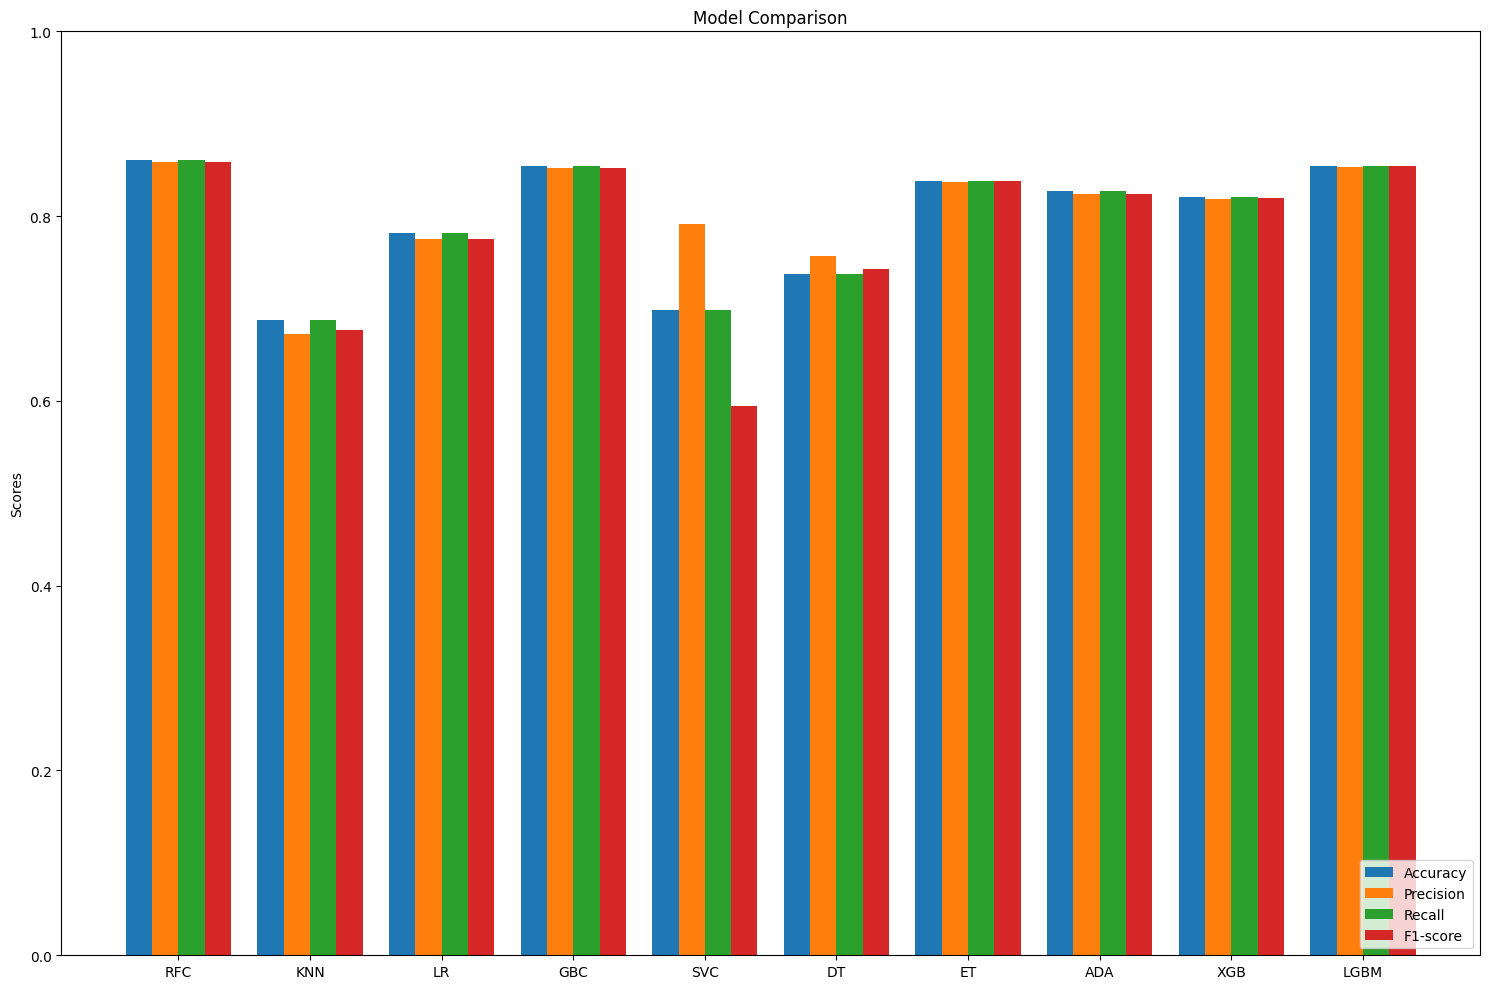

In [17]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
x = np.arange(len(models))
width = 0.2

fig, ax = plt.subplots(figsize=(15, 10))

for i, metric in enumerate(metrics):
    values = [result[metric] for result in results]
    ax.bar(x + i*width, values, width, label=metric)

ax.set_ylabel('Scores')
ax.set_title('Model Comparison')
ax.set_xticks(x + width * 1.5)
ax.set_xticklabels([result['Model'] for result in results])
ax.legend(loc='lower right')
ax.set_ylim(0, 1)

plt.tight_layout()
plt.show()

In [18]:
random_seed=42
X_train,X_test,y_train,y_test = train_test_split(dfe.drop('Survived',axis=1),dfe.Survived,test_size=0.2,random_state=42)

models = [
    {
        'name': 'Random Forest',
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [100, 200, 300],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    {
        'name': 'XGBoost',
        'model': XGBClassifier(),
        'params': {
            'n_estimators': [100, 200, 300],
            'max_depth': [3, 4, 5],
            'learning_rate': [0.01, 0.1, 0.3]
        }
    },
    {
        'name': 'Gradient Boosting',
        'model': GradientBoostingClassifier(),
        'params': {
            'n_estimators': [100, 200, 300],
            'learning_rate': [0.01, 0.1, 0.3],
            'max_depth': [3, 4, 5],
            'min_samples_split': [2, 5, 10]
        }
    },
    {
        'name': 'AdaBoost',
        'model': AdaBoostClassifier(),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 1.0],
            'algorithm': ['SAMME', 'SAMME.R']
        }
    },
    {
        'name': 'LightGBM',
        'model': LGBMClassifier(),
        'params': {
            'n_estimators': [100, 200, 300],
            'learning_rate': [0.01, 0.1, 0.3],
            'num_leaves': [31, 50, 100],
            'min_child_samples': [20, 30, 50]
        }
    }
]

# Function to evaluate model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

# Perform GridSearch with cross-validation for each model
results = []
for model_info in models:
    print(f"Evaluating {model_info['name']}...")
    random_search = RandomizedSearchCV(model_info['model'], model_info['params'], n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
    random_search.fit(X_train, y_train)
    
    # Get the best model
    best_model = random_search.best_estimator_
    
    # Evaluate on test set
    test_accuracy = evaluate_model(best_model, X_test, y_test)
    
    # Store results
    results.append({
        'name': model_info['name'],
        'best_params': random_search.best_params_,
        'mean_cv_accuracy': random_search.best_score_,
        'test_accuracy': test_accuracy
    })

# Print results
for result in results:
    print(f"\nModel: {result['name']}")
    print(f"Best Parameters: {result['best_params']}")
    print(f"Mean CV Accuracy: {result['mean_cv_accuracy']:.4f}")
    print(f"Test Accuracy: {result['test_accuracy']:.4f}")

# Identify the best model
best_model = max(results, key=lambda x: x['mean_cv_accuracy'])
print(f"\nBest Model: {best_model['name']}")
print(f"Mean CV Accuracy: {best_model['mean_cv_accuracy']:.4f}")
print(f"Test Accuracy: {best_model['test_accuracy']:.4f}")

Evaluating Random Forest...
Evaluating XGBoost...
Evaluating Gradient Boosting...
Evaluating AdaBoost...


/home/ck/miniconda3/envs/kaggle_env/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/ck/miniconda3/envs/kaggle_env/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/ck/miniconda3/envs/kaggle_env/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/ck/miniconda3/envs/kaggle_env/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed i

Evaluating LightGBM...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 214, number of negative: 355
[LightGBM] [Info] Number of positive: 215, number of negative: 355
[LightGBM] [Info] Number of positive: 214, number of negative: 355
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 215, number of negative: 355
[LightGBM] [Info] Number of positive: 215, number of negative: 355
[LightGBM] [Info] Number of positive: 214, number of negative: 356
[LightGBM] [War

In [161]:
random_seed=42
X_train,X_test,y_train,y_test = train_test_split(dfe.drop('Survived',axis=1),dfe.Survived,test_size=0.2,random_state=42)

models = [
    {
        'name': 'Random Forest',
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [10, 50, 75, 100, 200, 300, 400, 500],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10, 15],
            'min_samples_leaf': [1, 2, 4, 6]
        }
    },
    {
        'name': 'XGBoost',
        'model': XGBClassifier(),
        'params': {
            'n_estimators': [10, 50, 75, 100, 200, 300, 400, 500],
            'max_depth': [3, 4, 5, 7, 9, 11],
            'learning_rate': [.001, 0.01, 0.1, 0.3]
        }
    }
]

# Function to evaluate model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

# Perform GridSearch with cross-validation for each model
results = []
for model_info in models:
    print(f"Evaluating {model_info['name']}...")
    random_search = GridSearchCV(model_info['model'], model_info['params'], cv=5, scoring='accuracy', n_jobs=-1)
    random_search.fit(X_train, y_train)
    
    # Get the best model
    best_model = random_search.best_estimator_
    
    # Evaluate on test set
    test_accuracy = evaluate_model(best_model, X_test, y_test)
    
    # Store results
    results.append({
        'name': model_info['name'],
        'best_params': random_search.best_params_,
        'mean_cv_accuracy': random_search.best_score_,
        'test_accuracy': test_accuracy
    })

# Print results
for result in results:
    print(f"\nModel: {result['name']}")
    print(f"Best Parameters: {result['best_params']}")
    print(f"Mean CV Accuracy: {result['mean_cv_accuracy']:.4f}")
    print(f"Test Accuracy: {result['test_accuracy']:.4f}")

# Identify the best model
best_model = max(results, key=lambda x: x['mean_cv_accuracy'])
print(f"\nBest Model: {best_model['name']}")
print(f"Mean CV Accuracy: {best_model['mean_cv_accuracy']:.4f}")
print(f"Test Accuracy: {best_model['test_accuracy']:.4f}")

Evaluating Random Forest...
Evaluating XGBoost...

Model: Random Forest
Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Mean CV Accuracy: 0.8385
Test Accuracy: 0.8156

Model: XGBoost
Best Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}
Mean CV Accuracy: 0.8385
Test Accuracy: 0.8268

Best Model: XGBoost
Mean CV Accuracy: 0.8385
Test Accuracy: 0.8268


In [166]:
model = XGBClassifier(learning_rate= 0.1, max_depth= 4, n_estimators= 100)
model.fit(dfe.drop('Survived',axis=1),dfe.Survived)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

# Taking top performing model and applying to kaggle test csv

In [172]:
df = pd.read_csv('test.csv')
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['AgeGroup'] = df.apply(assign_age_group, axis=1)
median_ages = df.groupby('AgeGroup')['Age'].median()

def impute_age(row):
    if pd.isna(row['Age']):
        return median_ages.loc[row['AgeGroup']]
    return row['Age']

df['Age_Imputed'] = df.apply(impute_age, axis=1)
df['Age_Category'] = pd.cut(df['Age_Imputed'], 
                            bins=[0, 12, 18, 35, 50, 65, 100], 
                            labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Middle Aged', 'Senior'])
df['Deck'] = df['Cabin'].str[0]
deck_order = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

# Convert Deck to categorical, but only for non-null values
df.loc[df['Deck'].notna(), 'Deck'] = pd.Categorical(df.loc[df['Deck'].notna(), 'Deck'], 
                                                    categories=deck_order, 
                                                    ordered=True)

# Calculate the most common deck for each class, ignoring NaN values
most_common_deck = df.groupby('Pclass')['Deck'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty and x.notna().any() else np.nan)

# Function to assign deck based on class
def assign_deck(row):
    if pd.isna(row['Deck']):
        return most_common_deck[row['Pclass']]
    return row['Deck']

# Apply the function to assign decks
df['Assigned_Deck'] = df.apply(assign_deck, axis=1)
most_common_port = df['Embarked'].mode()[0]
df['Embarked'] = df['Embarked'].fillna(most_common_port)
df.drop(['Cabin','Deck','Age','AgeGroup','Name','Ticket'],axis=1,inplace=True)
encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(df[['Sex','Age_Category','Embarked','Assigned_Deck']])
feature_names = encoder.get_feature_names_out(['Sex','Age_Category','Embarked','Assigned_Deck'])
encoded_df = pd.DataFrame(encoded_data, columns=feature_names)
dfe = pd.concat([df, encoded_df], axis=1)
dfe.drop(['Sex','Age_Category','Embarked','Assigned_Deck'],axis=1, inplace=True)
df['Survived'] = model.predict(dfe)

In [178]:
submission = df[['PassengerId','Survived']]
submission.to_csv('titanic_submission.csv',index=False)

In [177]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [175]:
df.Survived.value_counts()

Survived
0    284
1    134
Name: count, dtype: int64

# Testing tensorflow Neural Networks

In [16]:
import tensorflow as tf

2024-08-07 17:06:57.134033: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-07 17:06:57.190824: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-07 17:06:57.243062: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-07 17:06:57.288578: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-07 17:06:57.301986: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-07 17:06:57.381448: I tensorflow/core/platform/cpu_feature_gu

In [21]:
X = dfe.drop('Survived',axis=1).values
y = dfe.Survived.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (25,)),
    tf.keras.layers.Dense(20,activation='relu'),
    tf.keras.layers.Dense(20,activation='relu'),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=.01),
                metrics=['accuracy'])

model_1_history = model_1.fit(tf.expand_dims(X_train, axis=-1),y_train,epochs=10)

Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4744 - loss: 3.6364    
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5835 - loss: 0.7286 
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6573 - loss: 0.6484 
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6711 - loss: 0.6253 
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6932 - loss: 0.6087 
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6895 - loss: 0.5986 
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7023 - loss: 0.5854 
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 892us/step - accuracy: 0.7005 - loss: 0.5948
Epoch 9/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 915us/step - accuracy: 0.6871 - loss: 0.5796
Epoch 10/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7057 - loss: 0.5629 


In [45]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (25,)),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(50,activation='relu'),
    tf.keras.layers.Dense(20,activation='relu'),
    tf.keras.layers.Dense(20,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

model_2_history = model_2.fit(tf.expand_dims(X_train, axis=-1),y_train,epochs=20,validation_data=(X_test,y_test))

Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5574 - loss: 30.3313 - val_accuracy: 0.5922 - val_loss: 0.6710
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6186 - loss: 0.6672 - val_accuracy: 0.5922 - val_loss: 0.6665
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6145 - loss: 0.6592 - val_accuracy: 0.6089 - val_loss: 0.6772
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6327 - loss: 0.6557 - val_accuracy: 0.6034 - val_loss: 0.6622
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6441 - loss: 0.6565 - val_accuracy: 0.5978 - val_loss: 0.6590
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6557 - loss: 0.6473 - val_accuracy: 0.5922 - val_loss: 0.6754
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6634 - loss: 0.6472 - val_accuracy: 0.5922 - val_loss: 0.6598
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6686 - loss: 0.6419 - val_accuracy: 0.5866 - val_loss

In [52]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (25,)),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(50,activation='relu'),
    tf.keras.layers.Dense(20,activation='relu'),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=.01),
                metrics=['accuracy'])

model_3_history = model_2.fit(tf.expand_dims(X_train, axis=-1),y_train,epochs=20,validation_data=(X_test,y_test))

Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6791 - loss: 0.6122 - val_accuracy: 0.6927 - val_loss: 0.6043
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6708 - loss: 0.6098 - val_accuracy: 0.6816 - val_loss: 0.6147
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6587 - loss: 0.6261 - val_accuracy: 0.6648 - val_loss: 0.6257
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6792 - loss: 0.6126 - val_accuracy: 0.6872 - val_loss: 0.6057
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6529 - loss: 0.6177 - val_accuracy: 0.7039 - val_loss: 0.6024
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6711 - loss: 0.6153 - val_accuracy: 0.7039 - val_loss: 0.6038
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6645 - loss: 0.6154 - val_accuracy: 0.6816 - val_loss: 0.6053
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6754 - loss: 0.6051 - val_accuracy: 0.6816 - val_loss: